In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
paths = ["prices_round_4_day_1.csv", "prices_round_4_day_2.csv", "prices_round_4_day_3.csv"]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])

df.tail(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
19980,3,2999000,COCONUT_COUPON,579.0,38.0,NaN,NaN,NaN,NaN,580,38,NaN,NaN,NaN,NaN,579.5,0.0
19981,3,2999000,COCONUT,9886.0,122.0,9885.0,46.0,NaN,NaN,9887,122,9888.0,46.0,NaN,NaN,9886.5,0.0
19982,3,2999100,COCONUT_COUPON,578.0,32.0,NaN,NaN,NaN,NaN,579,32,NaN,NaN,NaN,NaN,578.5,0.0
19983,3,2999100,COCONUT,9883.0,170.0,NaN,NaN,NaN,NaN,9885,101,9886.0,69.0,NaN,NaN,9884.0,0.0
19984,3,2999200,COCONUT_COUPON,577.0,35.0,NaN,NaN,NaN,NaN,578,35,NaN,NaN,NaN,NaN,577.5,0.0
19985,3,2999200,COCONUT,9883.0,148.0,9882.0,65.0,NaN,NaN,9884,148,9885.0,65.0,NaN,NaN,9883.5,0.0
19986,3,2999300,COCONUT,9883.0,108.0,9882.0,74.0,NaN,NaN,9884,108,9885.0,74.0,NaN,NaN,9883.5,0.0
19987,3,2999300,COCONUT_COUPON,577.0,37.0,NaN,NaN,NaN,NaN,578,37,NaN,NaN,NaN,NaN,577.5,0.0
19988,3,2999400,COCONUT_COUPON,577.0,39.0,NaN,NaN,NaN,NaN,578,39,NaN,NaN,NaN,NaN,577.5,0.0
19989,3,2999400,COCONUT,9883.0,118.0,9882.0,69.0,NaN,NaN,9885,187,NaN,NaN,NaN,NaN,9884.0,0.0


In [32]:
size = 30000

coconut = np.array(df[df["product"] == "COCONUT"]['mid_price'].to_list()[0:size])
coupon = np.array(df[df["product"] == "COCONUT_COUPON"]['mid_price'].to_list()[0:size])

COCONUT_MEAN = np.mean(coconut)
COUPON_MEAN = np.mean(coupon)

times = [i for i in range(size)]

predicted_coupon = [(coco_price - COCONUT_MEAN) * 0.5 + COUPON_MEAN for coco_price in coconut]



ranges = [0.0001 * i + 0.5 for i in range(1000)]
print(ranges)

best_rmse = 1e9
factor = -1
for i in ranges:
    predicted_coupon = [(coco_price - COCONUT_MEAN) * i + COUPON_MEAN for coco_price in coconut]

    rmse = np.sqrt(np.mean((predicted_coupon-coupon)**2))

    if rmse < best_rmse:
        best_rmse = rmse
        factor = i

print(best_rmse, factor)


[0.5, 0.5001, 0.5002, 0.5003, 0.5004, 0.5005, 0.5006, 0.5007, 0.5008, 0.5009, 0.501, 0.5011, 0.5012, 0.5013, 0.5014, 0.5015, 0.5016, 0.5017, 0.5018, 0.5019, 0.502, 0.5021, 0.5022, 0.5023, 0.5024, 0.5025, 0.5026, 0.5027, 0.5028, 0.5029, 0.503, 0.5031, 0.5032, 0.5033, 0.5034, 0.5035, 0.5036, 0.5037, 0.5038, 0.5039, 0.504, 0.5041, 0.5042, 0.5043, 0.5044, 0.5045, 0.5046, 0.5047, 0.5048, 0.5049, 0.505, 0.5051, 0.5052, 0.5053, 0.5054, 0.5055, 0.5056, 0.5057, 0.5058, 0.5059, 0.506, 0.5061, 0.5062, 0.5063, 0.5064, 0.5065, 0.5066, 0.5067, 0.5068, 0.5069, 0.507, 0.5071, 0.5072, 0.5073, 0.5074, 0.5075, 0.5076, 0.5077, 0.5078, 0.5079, 0.508, 0.5081, 0.5082, 0.5083, 0.5084, 0.5085, 0.5086, 0.5087, 0.5088, 0.5089, 0.509, 0.5091, 0.5092, 0.5093, 0.5094, 0.5095, 0.5096, 0.5097, 0.5098, 0.5099, 0.51, 0.5101, 0.5102, 0.5103, 0.5104, 0.5105, 0.5106, 0.5107, 0.5108, 0.5109, 0.511, 0.5111, 0.5112, 0.5113, 0.5114, 0.5115, 0.5116, 0.5117, 0.5118, 0.5119, 0.512, 0.5121, 0.5122, 0.5123, 0.5124, 0.5125, 0.5126,

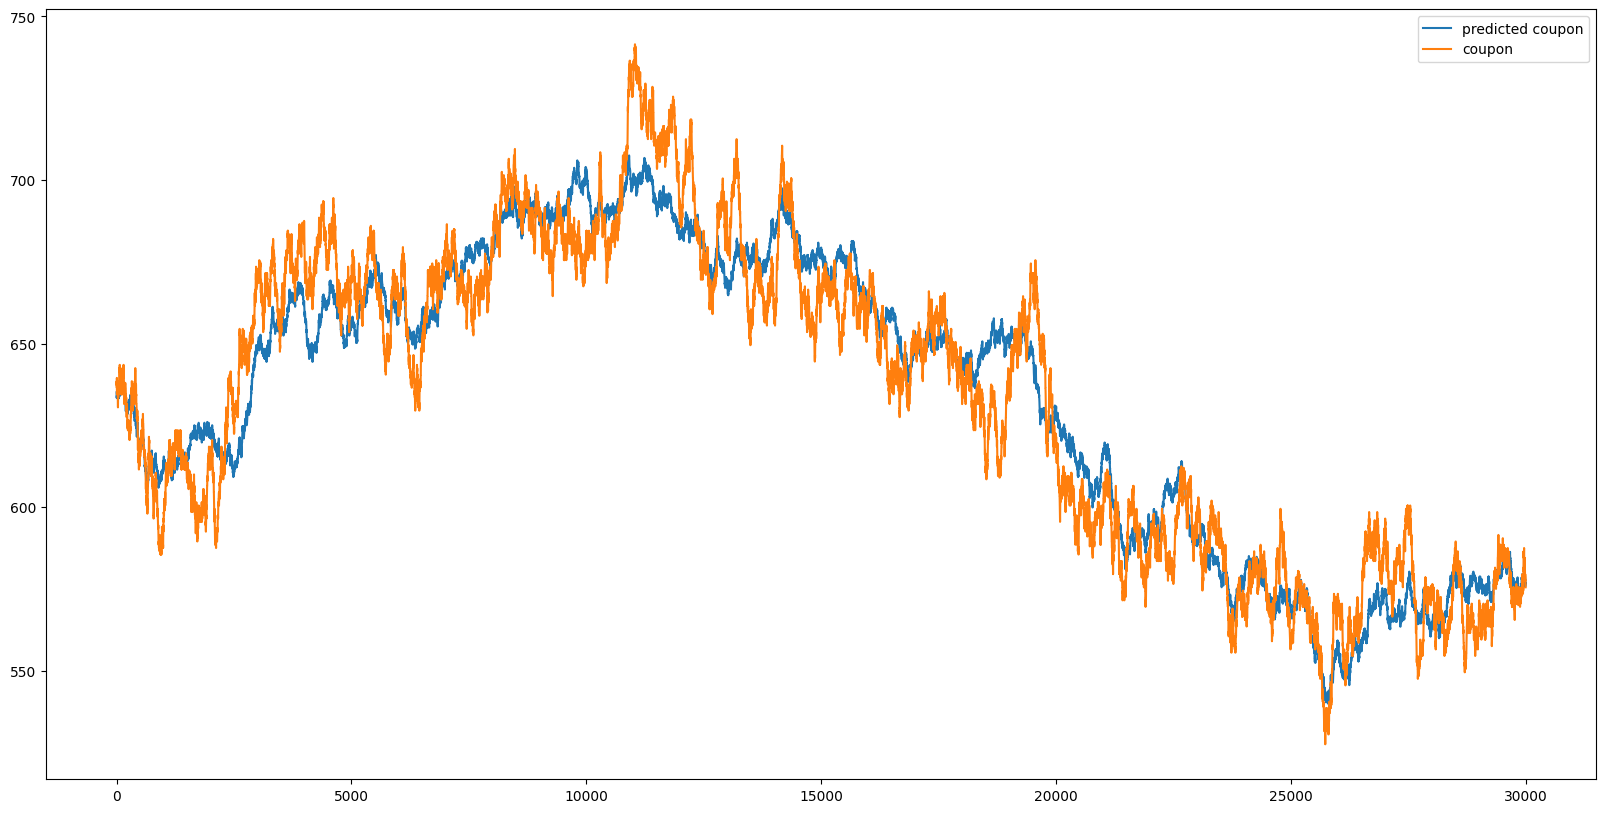

In [33]:
predicted_coupon = [(coco_price - COCONUT_MEAN) * factor + COUPON_MEAN for coco_price in coconut]
plt.figure(figsize=(20, 10))
plt.plot(times, predicted_coupon, label='predicted coupon')
plt.plot(times, coupon, label='coupon')
plt.legend()

In [34]:
print(sum(coupon))

19051393.0


1.5158245029548803e-13 13.381762769877048


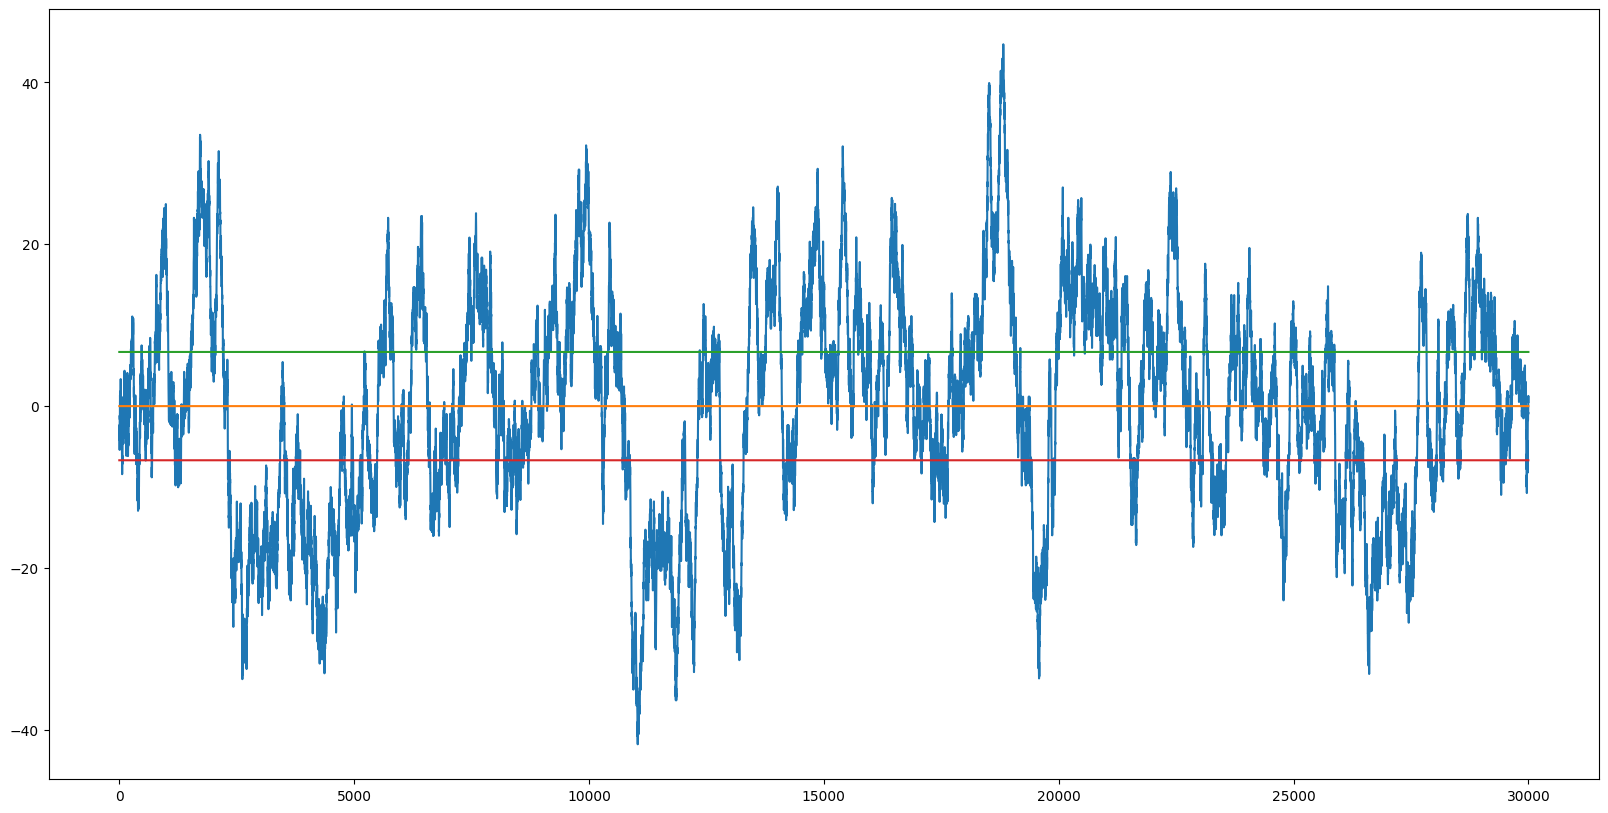

In [35]:
difference = [predicted_coupon[i] - coupon[i] for i in range(size)]
difference_mean = np.mean(difference)
difference_std = np.std(difference)

print(difference_mean, difference_std)

plt.figure(figsize=(20, 10))
plt.plot(times, difference)
plt.plot(times, [difference_mean for _ in range(size)])
plt.plot(times, [0.5*difference_std for _ in range(size)])
plt.plot(times, [-0.5*difference_std for _ in range(size)])

In [45]:
size = 30000
COCONUT_MEAN = 9999.900983333333
COUPON_MEAN = 635.0464333333333

coconut = np.array(df[df["product"] == "COCONUT"]['mid_price'].to_list()[0:size])
coupon = np.array(df[df["product"] == "COCONUT_COUPON"]['mid_price'].to_list()[0:size])

times = [i for i in range(size)]

predicted_coupon = [(coco_price - COCONUT_MEAN) * 0.5 + COUPON_MEAN for coco_price in coconut]



ranges = [0.0001 * i + 0.5 for i in range(5000)]
print(ranges[0], ranges[-1])

best_rmse = 1e9
factor = -1
for i in ranges:
    predicted_coupon = [(coco_price - COCONUT_MEAN) * i + COUPON_MEAN for coco_price in coconut]

    rmse = np.sqrt(np.mean((predicted_coupon-coupon)**2))

    if rmse < best_rmse:
        best_rmse = rmse
        factor = i

print(best_rmse, factor)

delta = (derivative price - derivative mean) / (asset price - asset mean) 


0.5 0.9999
13.38176276987705 0.5029


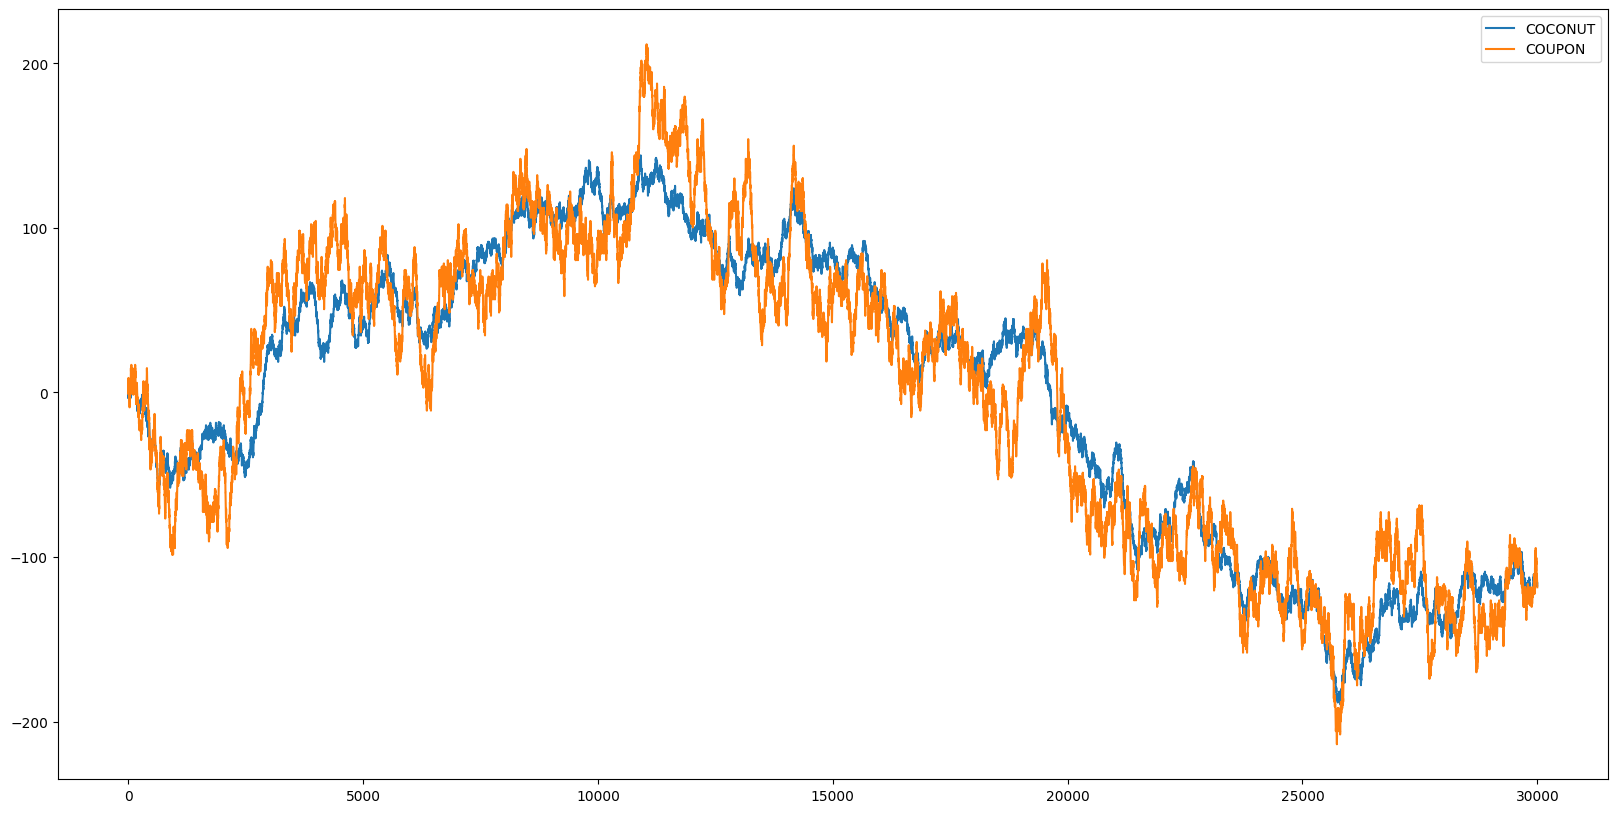

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(times, coconut-COCONUT_MEAN, label='COCONUT')
plt.plot(times, 1.988*(coupon-COUPON_MEAN), label='COUPON')
plt.legend()

In [38]:
np.std(coconut)

88.75266514702373